In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import re
from matplotlib import pyplot as plt
import nltk
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
import string
import unicodedata

from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud,STOPWORDS
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize,sent_tokenize
from bs4 import BeautifulSoup
import re,string,unicodedata
from keras.preprocessing import text, sequence
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.model_selection import train_test_split
from string import punctuation
import keras
from keras.models import Sequential
import tensorflow as tf

In [2]:
import argparse
import pandas as pd
import numpy as np
import operator
import nltk as nl
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.model_selection import ParameterGrid
import statistics
import random

from google.cloud import language
from google.cloud.language import enums
from google.cloud.language import types

/usr/local/lib/python3.7/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
path = "/content/drive/My Drive/MLLP/"

In [15]:
all_postitive = pd.read_csv(path + "Positive.csv",encoding='latin-1')

In [17]:
all_negative = pd.read_csv(path + "Negative.csv",encoding='latin-1')

In [18]:
# all_postitive.rename(columns = {'Unnamed: 0':'label'}, inplace = True)
all_postitive

,label,Title,Word Count,Source Name,Body
0,1,(RIVN) Shareholder DEADLINE: Did You Suffer a ...,523 words,Newsfile,What actions may I take at this time? If you s...
1,1,Complaints against airlines rise 94% in the fi...,344 words,CE NoticiasFinancieras,Complaints The complaint resolution rate this ...
2,1,Why Aptus Value Housing Finance is a promising...,1092 words,BusinessLine Online,Why affordable housing Post the mega HDFC Limi...
3,1,Polyester Filament Yarn Market Research Report,336 words,Textile Value Chain,Some of the key manufacturers operating in thi...
4,1,Corteva Agriscience Opens Its First Seed Appli...,333 words,Chemical Industry Digest,"CSATs act as a laboratory, testing center and ..."
...,...,...,...,...,...
995,1,DiscoverIE FY underlying earnings expected to ...,191 words,Sharecast,The FTSE 250-listed firm stated group sales fo...
996,1,Bristol start-up agrees deal with Australian G...,403 words,business-live.co.uk,"HdE AGENCY, a marketing business based in the ..."
997,1,Agricultural start-ups need long-term business...,400 words,Vietnam News Summary,But the use of technology remains limited sinc...
998,1,Vietnamese mining company seeks to expand alum...,239 words,Vietnam News Summary,"If it gets the green light, the output of alum..."


In [19]:
# all_negative.rename(columns = {'Unnamed: 0':'label'}, inplace = True)
all_negative

,label,Title,Word Count,Source Name,Body
0,0,What restaurants are open Easter 2022? Starbuc...,528 words,USA Today Online,"Most Starbucks, McDonald's and Dunkin' locatio..."
1,0,"When Quitting Normalizes, Benefit to Low-Wage ...",828 words,The Wall Street Journal Online,The resulting imbalance between available jobs...
2,0,29-year-old survived off federal benefit but h...,235 words,The Toronto Star,We speak with financial adviser Jason Heath fo...
3,0,Midnight assault on P'kula hotelier,343 words,Hindustan Times,"""The driver started following me and when we r..."
4,0,Midnight assault on Panchkula based hotelier,347 words,Hindustan Times,"""The driver started following me and when we r..."
...,...,...,...,...,...
995,0,What Â£1 million buys you in,576 words,The Times,Contact michaelgraham.co.uk Devon Built in the...
996,0,Ex-TM Lewin staff win fight for payout over jo...,287 words,The Daily Telegraph,A total of 101 former workers are now set to r...
997,0,Insolvency plea filed over payment default: Ba...,380 words,Financial Express,"According to banking sources, the Future Group..."
998,0,BoI moves insolvency plea against FRL,257 words,Hindustan Times,"Earlier, Future Retail's directors said the co..."


In [20]:
train_df_pos,test_df_pos=train_test_split(all_postitive,test_size=0.2,shuffle=True)
train_df_pos,val_df_pos=train_test_split(train_df_pos,train_size=0.75)

In [21]:
train_df_neg,test_df_neg=train_test_split(all_negative,test_size=0.2,shuffle=True)
train_df_neg,val_df_neg=train_test_split(train_df_neg,train_size=0.75)

In [22]:
train=pd.concat([train_df_neg,train_df_pos],axis=0)
# train

In [23]:
train_f=train.sample(frac=1,random_state=1)
train_f

,label,Title,Word Count,Source Name,Body
693,1,People Moves: SAN Group Welcomes Fornari; Alli...,312 words,Insurance Journal,"In this position, Fornari will be responsible ..."
315,1,Iran's oil output up - OPEC,219 words,Caspian Oil & Gas Trends,The OPEC report showed Iran's oil production i...
248,1,AE OPCO III: Seeks to Hire Johnson Pope Bokor ...,326 words,Troubled Company Reporter,"AE OPCO III, LLC seeks approval from the U.S. ..."
503,0,"Duo loses car, cash as thieves strike during n...",339 words,The Times of India,"Carrying sharp-edged weapons, the trio threate..."
638,1,INVESTOR ALERT: Law Offices of Howard G. Smith...,560 words,Business Wire,Investors suffering losses on their Stronghold...
...,...,...,...,...,...
833,1,GLOBAL BROKER RATINGS: BofA raises Rightmove; ...,264 words,Alliance News Global 500 Corporate,BASIC MATERIALS ---------- Deutsche Bank rese...
971,1,Futu SG (moomoo) achieves 4.3 times over-subsc...,1386 words,PR Newswire Asia,"SINGAPORE, April 14, 2022 /PRNewswire/ -- Futu..."
549,1,Public hearings convened to update gas and ele...,715 words,CE NoticiasFinancieras,"On the other hand, the average correction for ..."
426,0,Government spending Â£1.2 million a day housin...,696 words,Evening Standard Online,"Overall, around 25,000 asylum seekers are in h..."


In [26]:
train_f.to_csv(path_or_buf="train.csv")
!cp train.csv "/content/drive/My Drive/MLLP/"

In [24]:
val_f=pd.concat([val_df_neg,val_df_pos],axis=0)
val_f=val_f.sample(frac=1,random_state=1)
test_f=pd.concat([test_df_neg,test_df_pos],axis=0)
test_f=test_f.sample(frac=1,random_state=1)
test_f

,label,Title,Word Count,Source Name,Body
465,1,BSP okays $4.8-B public loans,421 words,Manila Bulletin,US dollar Reuters/File Photo (Manila Bulletin)...
966,0,'I'm finding my new voice and loving every mom...,4182 words,Mail Online,* Scant details around Saget's death are curre...
187,1,"LIC IPO: Centre Wooing Sovereign, Pension Fund...",522 words,The Economic Times - Mumbai Edition,The funds had shown interest and the governmen...
579,1,U.S. Department of Labor - Ocean County landsc...,737 words,U.S. Government News and Documents via PUBT,"BAYVILLE, NJ - Following a U.S. Department of ..."
679,0,MultiChoice Makes Major Changes To Their Sream...,345 words,AllAfrica,The broadcaster said[https://www.dstv.com/en-z...
...,...,...,...,...,...
421,1,AI LAWSUIT ALERT: Levi & Korsinsky Notifies C3...,612 words,Newsfile,https://www.zlk.com/pslra-1/c3-ai-inc-loss-sub...
916,0,MLL revenues plunged last year,645 words,Winnipeg Free Press,âIt's safe to say that the impact of the pan...
344,1,Amazon's New CEO Pledges To Improve Worker Safety,745 words,The Wall Street Journal,"""We spent Amazon's first 25 years building a v..."
14,1,These Are The 5 Best Tech Stocks To Watch Now,1782 words,Investor's Business Daily,A rising interest rate environment isn't good ...


In [27]:
val_f.to_csv(path_or_buf="val.csv")
!cp val.csv "/content/drive/My Drive/MLLP/"
test_f.to_csv(path_or_buf="test.csv")
!cp test.csv "/content/drive/My Drive/MLLP/"

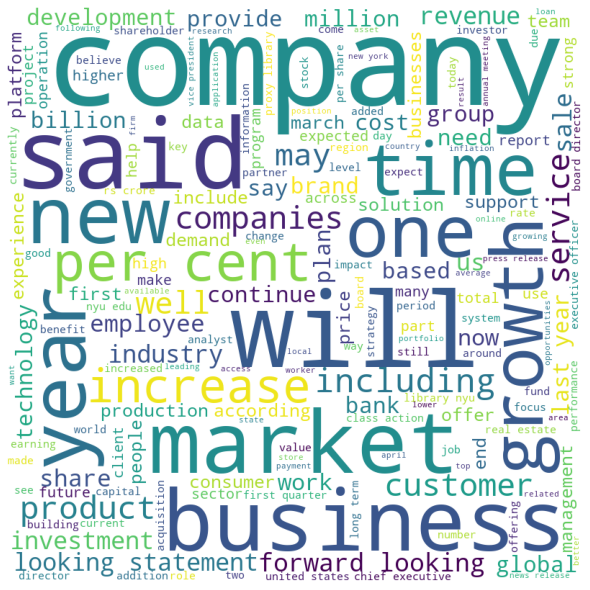

In [34]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import pandas as pd
 
df = pd.read_csv(path + "Positive.csv", encoding ="latin-1")
 
comment_words = ''
stopwords = set(STOPWORDS)
 
# iterate through the csv file
for val in df["Body"]:
     
    # typecaste each val to string
    val = str(val)
 
    # split the value
    tokens = val.split()
     
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    comment_words += " ".join(tokens)+" "
 
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

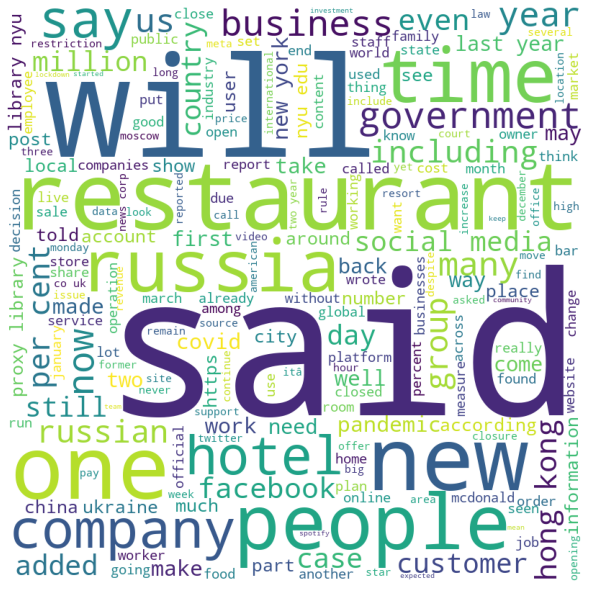

In [35]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import pandas as pd
 
df = pd.read_csv(path + "Negative.csv", encoding ="latin-1")
 
comment_words = ''
stopwords = set(STOPWORDS)
 
# iterate through the csv file
for val in df["Body"]:
     
    # typecaste each val to string
    val = str(val)
 
    # split the value
    tokens = val.split()
     
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    comment_words += " ".join(tokens)+" "
 
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()